## **Predicting the probability of insurance losses**

Our goal is to develop and evaluate a predictive model that accurately identifies the likelihood of insurance claims, despite the inherent class imbalance in the dataset.

**1. Importing necessary libraries**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

**Now we add our imbalanced dataset**

Features:

`policy_id`: Unique identifier for the insurance policy.

`subscription_length`: The duration for which the insurance policy is active.

`customer_age`: Age of the insurance policyholder, which can influence the likelihood of claims.

`vehicle_age`: Age of the vehicle insured, which may affect the probability of claims due to factors like wear and tear.

`model`: The model of the vehicle, which could impact the claim frequency due to model-specific characteristics.

`fuel_type`: Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), which might influence the risk profile and claim likelihood.

`max_torque, max_power`: Engine performance characteristics that could relate to the vehicle’s mechanical condition and claim risks.

`engine_type`: The type of engine, which might have implications for maintenance and claim rates.

`displacement‍`, `cylinder`: Specifications related to the engine size and construction, affecting the vehicle’s performance and potentially its claim history.

`region_code`: The code representing the geographical region of the policyholder, as claim patterns can vary regionally.

`region_density`: Population density of the policyholder’s region, which could correlate with accident and claim frequencies.

`airbags`: The number of airbags in the vehicle, indicating safety level which can influence claim probability.

`is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System)`: Features that enhance vehicle safety and could potentially reduce the likelihood of claims.

`is_parking_sensors, is_parking_camera`: Parking aids that might affect the probability of making a claim, especially in urban areas.

`rear_brakes_type`: Type of rear brakes, which could be related to the vehicle’s stopping capability and safety.

Features like `steering_type`, `turning_radius`, `length`, `width`, `gross_weight`, and various other binary indicators (Yes/No) for specific vehicle amenities and safety features, which together build a profile of the vehicle’s characteristics and its associated risk factors.

`claim_status`: Indicates whether a claim was made (1) or not (0), which is the dependent variable the model aims to predict.

In [8]:
df = pd.read_csv('Insurance-claims-data.csv',)

In [9]:
df.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


In [10]:
pd.isna(df)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58589,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [12]:
# With this command, we find that our values ​​0 and 1 are not equal and our dataset is imbalanced.
df['claim_status'].value_counts()

claim_status
0    54844
1     3748
Name: count, dtype: int64

In [14]:
# Let’s have a quick look at whether the data contains any null values or not
df.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

Let’s start with visualizing the distribution of the claim_status to understand the class balance.

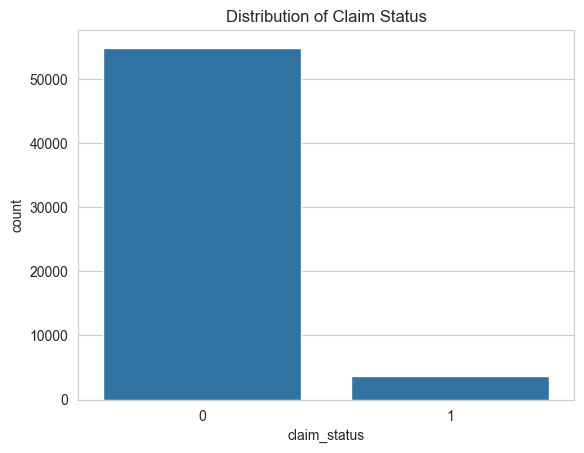

In [85]:
sns.countplot(df, x='claim_status')
plt.title('Distribution of Claim Status');